### MATH2504 S2, 2023, BigHW Submission 
### Submission form IV of IV 

Student #1 name: Molly O'Toole

Student #1 ID: 47524220

Student #2 name: Andrea Brouwers

Student #2 ID: 47497155

GitHub repo: git@github.com:mollyotoole09/Molly-OToole_Andrea-Brouwers-2504-2023-BigHW.git

---

**Note: It is expected that this notebook be runnable in the sense that the marker can select "Restart & Run All" and all code cells of solutions will execute. This requires not to have name clashes between solutions.**

---

# Solution to [Question 13](https://courses.smp.uq.edu.au/MATH2504/2023/assessment_html/bighw.html#q13)

## 13a:

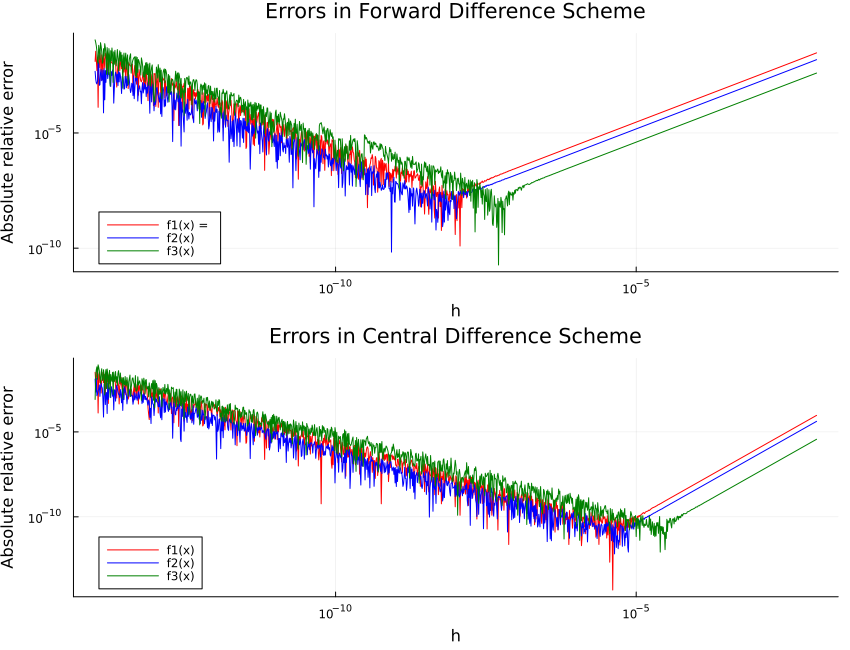

"Error for Forward Difference Scheme"

"The optimal h for f1 is 1.1748975549395302e-8"

"The optimal h for f2 is 8.511380382023759e-10"

"The optimal h for f3 is 5.128613839913648e-8"

"Error for Central Difference Scheme"

"The optimal h for f1 is 4.073802778041131e-6"

"The optimal h for f2 is 4.365158322401657e-6"

"The optimal h for f3 is 2.5118864315095822e-5"

In [311]:
using Plots

#define the forward difference and central difference schemes (from lectures)
diff_forward(f, x; h = sqrt(eps())) = (f(x+h) - f(x))/h
diff_central(f, x; h = sqrt(eps())) = (f(x + (h/2)) - f(x - (h/2)))/h

#define each function and its derivative
f1(x) = cos(x^2)
f1_der(x) = -2*x*sin(x^2)
f2(x) = exp(x^2)
f2_der(x) = 2*x*exp(x^2)
f3(x) = (atan(x))/(1 + exp(-4x^2)) 
f3_der(x) = (1 + exp(-4x^2) + (8*exp(-4x^2) * atan(x) * (x^3 + x)))/((1+exp(-4x^2))^2 * (x^2 + 1))

#define x values for each function being tested
x1, x2, x3 = 1/2, 1, 2

#set h range
h_range = 10 .^ (-14:0.01:-2)

#errors for f1 function (forward and central)
errs11 = [abs(diff_forward(f1, x1; h = h) - f1_der(x1))/abs(f1_der(x1)) for h in h_range]
errs12 = [abs(diff_central(f1, x1; h = h) - f1_der(x1))/abs(f1_der(x1)) for h in h_range]

#errors for f2 function (forward and central)
errs21 = [abs(diff_forward(f2, x2; h = h) - f2_der(x2))/abs(f2_der(x2)) for h in h_range]
errs22 = [abs(diff_central(f2, x2; h = h) - f2_der(x2))/abs(f2_der(x2)) for h in h_range]

#errors for f3 function (forward and central)
errs31 = [abs(diff_forward(f3, x3; h = h) - f3_der(x3))/abs(f3_der(x3)) for h in h_range]
errs32 = [abs(diff_central(f3, x3; h = h) - f3_der(x3))/abs(f3_der(x3)) for h in h_range]

#plot for errors in forward difference scheme
p1 = plot(h_range,[errs11 errs21 errs31 ], yaxis = :log,xaxis = :log,
    xlabel="h",ylabel="Absolute relative error",
    label = ["f1(x) = " "f2(x)" "f3(x)"], c = [:red :blue :green], legend = :bottomright, title = "Errors in Forward Difference Scheme")

#plot for errors in central difference scheme
p2 = plot(h_range,[errs12 errs22 errs32 ], yaxis = :log,xaxis = :log,
    xlabel="h",ylabel="Absolute relative error",
    label = ["f1(x)" "f2(x)" "f3(x)"], c = [:red :blue :green], legend = :bottomright, title = "Errors in Central Difference Scheme")

#display both Plots
display(plot(p1, p2, size=(850,650), layout = (2,1), legend=:bottomleft))

errs1 = [errs11, errs21, errs31] #define forward difference scheme errors
errs2 = [errs12, errs22, errs32] #define central difference scheme errors


display("Error for Forward Difference Scheme")
for i in 1:3 
    optimal_index_forward = argmin(errs1[i])
    optimal_h_forward = h_range[optimal_index_forward]
    display("The optimal h for f$(i) is $(optimal_h_forward)")
end 


display("Error for Central Difference Scheme")
for i in 1:3
    optimal_index_central = argmin(errs2[i])
    optimal_h_central = h_range[optimal_index_central]
    display("The optimal h for f$(i) is $(optimal_h_central)")
end

#had to change the println commands to display because they were not printing the output 

## 13b:

Firstly, the Jacobian is defined to be a maxtrix of the partial derivatives of S($z$) with dimension K x K. Using the forward difference scheme, we need to compute $$ \frac{\partial f_i}{\partial z_j} \approx \frac{f_i(z+he_j)-f_i(z)}{h}$$ where $e_j$ is a unit vector in the $j^{th}$ direction. This requires us to evaluate the softmax function twice, once for the vector $z$, and again for the vector $z + he_j$. If every partial derivative in the Jacobian is calculated this way, we end up with $2K^2$ evaluations of the softmax function, because there are K rows and K columns, with each element evaluated twice. 

Similarly, for the central difference scheme, we need to compute $$ \frac{\partial f_i}{\partial z_j} \approx \frac{f_i(z + \frac{h}{2}e_j) - f_i(z - \frac{h}{2}e_j)}{h} $$ where $e_j$ is a unit vector in the $j^{th}$ direction. Like before, we need to evaluate the softmax function twice at each partial derivative, once for $ z + \frac{h}{2} e_j$ and once for $ z - \frac{h}{2} e_j$. We therefore have that the number of softmax evaluations for the central difference scheme is also $2K^2$.

## 13c:

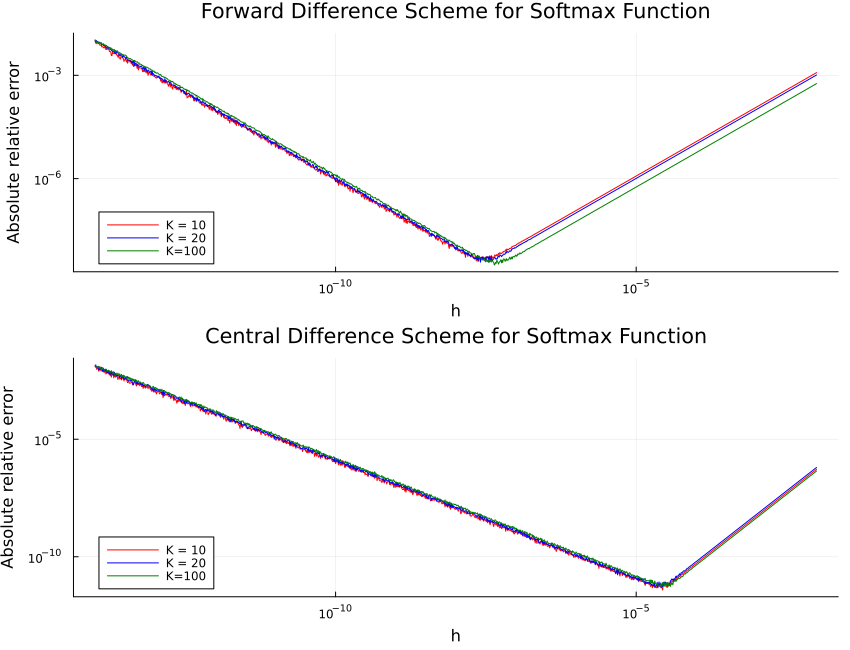

"Error for Forward Difference Scheme"

"The optimal h for K = 10 is 1.0e-14"

"The optimal h for K = 20 is 1.0e-14"

"The optimal h for K = 100 is 1.0e-14"

"Error for Central Difference Scheme"

"The optimal h for K  = 10 is 1.0e-14"

"The optimal h for K  = 20 is 1.0e-14"

"The optimal h for K  = 100 is 1.0e-14"

In [339]:
using LinearAlgebra, Plots

#define softmax function
function softmax(z)
    return exp.(z) / sum(exp.(z))
end

#define actual softmax jacobian
function jacobian(z)
    k = length(z)
    sm = softmax(z)
    J = zeros(k, k)
    for i in 1:k
        for j in 1:k
            J[i,j] = sm[i] * (i == j ? 1 - sm[i] : -sm[j])
        end
    end 
    return J
end

# forward difference scheme for softmax function
function softmax_diff_forward(z, h)
    k = length(z)
    sm = softmax(z)
    J1 = zeros(k,k)
    for j in 1:k 
        diff_z = copy(z)
        diff_z[j] += h
        J1[:, j] = (softmax(diff_z) .- sm) / h
    end
    return J1
end

# central difference scheme for softmax function
function softmax_diff_central(z, h)
    k = length(z)
    sm = softmax(z)
    J2 = zeros(k,k)
    for j in 1:k
        diff_z_positive = copy(z)
        diff_z_negative = copy(z)
        diff_z_positive[j] += h/2
        diff_z_negative[j] -= h/2
        J2[:, j] = (softmax(diff_z_positive) .- softmax(diff_z_negative)) / h
    end
    return J2
end

#find error in actual jacobian and predicted jacobian for forward difference scheme
function error_jacobian_forward(z, h)
    error1 = norm(jacobian(z) - softmax_diff_forward(z,h))
    return error1
end

#find error in actual jacobian and predicted jacobian for central difference scheme
function error_jacobian_central(z, h)
    error2 = norm(jacobian(z) - softmax_diff_central(z,h))
    return error2
end

#define k values, h values, and empty arrays for forward and central errors
k_values = [10, 20, 100]
h_range = 10 .^ (-14:0.01:-2)
error_forward = [[],[],[]]
error_central = [[],[],[]]
labels = ["K = 10", "K = 20", "K = 100"]

#iterate through k values to find errors
for (index, k) in enumerate(k_values)
    z = [i^(1/3) for i in 1:k]
    J_explicit = jacobian(z)

    error_forward[index] = error_jacobian_forward.(Ref(z), h_range)
    error_central[index] = error_jacobian_central.(Ref(z), h_range)
end 

#plot error of jacobian for both forward and central difference schemes
p1 = plot(h_range, [error_forward[1], error_forward[2], error_forward[3]], yaxis = :log,xaxis = :log,
    xlabel="h",ylabel="Absolute relative error",
    label = ["K = 10" "K = 20" "K=100"], c = [:red :blue :green], legend = :bottomright, title = "Forward Difference Scheme for Softmax Function")

p2 = plot(h_range, [error_central[1], error_central[2], error_central[3]], yaxis = :log,xaxis = :log,
    xlabel="h",ylabel="Absolute relative error",
    label = ["K = 10" "K = 20" "K=100"], c = [:red :blue :green], legend = :bottomright, title = "Central Difference Scheme for Softmax Function")

display(plot(p1, p2, size=(850,650), layout = (2,1), legend=:bottomleft)) 


display("Error for Forward Difference Scheme")
for (index, i) in enumerate(k_values)
    optimal_index_forward = argmin(error_forward[index, :])
    optimal_h_forward = h_range[optimal_index_forward]
    display("The optimal h for K = $(i) is $(optimal_h_forward)")
end 


display("Error for Central Difference Scheme")
for (index, i) in enumerate(k_values)
    optimal_index_central = argmin(error_central[index, :])
    optimal_h_central = h_range[optimal_index_central]
    display("The optimal h for K  = $(i) is $(optimal_h_central)")
end

#had to change the println commands to display because they were not printing the output 

---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---

# Solution to [Question 14](https://courses.smp.uq.edu.au/MATH2504/2023/assessment_html/bighw.html#q14)

In [337]:
using LinearAlgebra, StatsBase

#function for Probability matrix
function structured_P(L::Int; p::Float64 = 0.45, r::Float64 = 0.01)::Matrix{Float64}
    q = 1 - p - r
    P = diagm(fill(r,L)) + diagm(-1=>fill(q,L-1)) + diagm(1 => fill(p,L-1))
    P[1,1] = 1-p
    P[L,L] = 1-q
    return P
end

#function for structured π
structured_π(L::Int; p::Float64 = 0.45, r::Float64 = 0.01)::Vector{Float64} = begin
    q = 1 - p - r
    [(p/q)^i  for i in 1:L] * (q-p) / p / (1-(p/q)^L) #Explicit expression (birth death)
end;
    
#METHOD 1
function method_one(L::Int; p::Float64 = 0.45, r::Float64 = 0.01)::Vector{Float64}
    #We want to solve π(I - P) = 0 where A = I - P and b = 0 
    P = structured_P(L, p=p, r=r)
    A = I - P
    b = zeros(L)
    A = vcat(A, ones(1, L))
    b = vcat(b, 1)
    return A\b
end 

#METHOD 2
function method_two(L::Int; p::Float64 = 0.45, r::Float64 = 0.01, n::Int = 10^5)::Vector{Float64}
    P = structured_P(L, p=p, r=r)
    #use the identity matrix as the initial distribution because all rows sum to 1
    initial = I
    limit_π = vec(initial * P^n)        
    return limit_π
end 

#METHOD 3
function method_three(L::Int; p::Float64 = 0.45, r::Float64 = 0.01)::Vector{Float64}
    P = structured_P(L, p=p, r=r)
    P_eigenvalues = eigvals(P)
    P_eigenvectors = eigvecs(P)
    _, eigval_max = findmax(P_eigenvalues)
    eigvec_max = P_eigenvectors[:, eigval_max]
    return eigvec_max/sum(eigvec_max)        
end 

#METHOD 4
function method_four(L::Int; p::Float64 = 0.45, r::Float64 = 0.01, n::Int = 10^5)::Vector{Float64}
    P = structured_P(L, p=p, r=r)
    #use the identity matrix as the initial distribution because all rows sum to 1
    initial = I
    cols = size(P)[2]
    markov_states = [i for i in 1:cols]
    x0 = sample(markov_states, n, replace = true)
    indicator = zeros(cols)
    for i in 1:cols
        for j in 1:n 
            (x0[j] == i) ? indicator[i] += 1 : indicator[i] += 0
        end
    end
    limit_π = (1/n) * indicator
    return limit_π
end

#function for euclidean norm difference
function norm_difference(method_function, L::Int, p::Float64 = 0.45, r::Float64 = 0.01)
    exact_π = structured_π(L, p=p, r=r)
    norm_π = method_function(L, p=p, r=r)
    return norm(norm_π - exact_π)
end

#list of L values and empty arrays for the norm error of each method
L_list = [2,3,4,5,10,20,30,40,50,100,200,300,400,500,1000]
norms_method_one = zeros(BigFloat, length(L_list))
norms_method_two = zeros(BigFloat, length(L_list))
norms_method_three = zeros(BigFloat, length(L_list))
norms_method_four = zeros(BigFloat, length(L_list))

#iterating through the values of L for each method, calculating the norm for the method and the structured function
for (i, L) in enumerate(L_list)
    norms_method_one[i] = norm_difference(method_one, L)
    norms_method_two[i] = norm_difference(method_two, L)
    norms_method_three[i] = norm_difference(method_three, L)
    norms_method_four[i] = norm_difference(method_four, L)
end

#plotting each method
plot(L_list, norms_method_one, label="Method 1")
plot!(L_list, norms_method_two, label="Method 2")
plot!(L_list, norms_method_three, label="Method 3")
plot!(L_list, norms_method_four, label="Method 4", legend=:bottomright)
xlabel!("L")
ylabel!("Norm Difference")
title!("Accuracy Comparison of Methods")


DimensionMismatch: DimensionMismatch: dimensions must match: a has dims (Base.OneTo(4),), b has dims (Base.OneTo(2),), mismatch at 1

---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---

In [222]:
using LinearAlgebra, StatsBase

function structured_P(L::Int; p::Float64 = 0.45, r::Float64 = 0.01)::Matrix{Float64}
    q = 1 - p - r
    P = diagm(fill(r,L)) + diagm(-1=>fill(q,L-1)) + diagm(1 => fill(p,L-1))
    P[1,1] = 1-p
    P[L,L] = 1-q
    return P
end

structured_π(L::Int; p::Float64 = 0.45, r::Float64 = 0.01)::Vector{Float64} = begin
    q = 1 - p - r
    [(p/q)^i  for i in 1:L] * (q-p) / p / (1-(p/q)^L) #Explicit expression (birth death)
end;
    

function method_one(L::Int; p::Float64 = 0.45, r::Float64 = 0.01)::Vector{Float64}
    #We want to solve π(I - P) = 0 where A = I - P and b = 0 
    P = structured_P(L, p=p, r=r)
    A = I - P
    b = zeros(L)
    A = vcat(A, ones(1, L))
    b = vcat(b, 1)
    return A\b
end 


function method_two(L::Int; p::Float64 = 0.45, r::Float64 = 0.01, n::Int = 10^5)::Vector{Float64}
    P = structured_P(L, p=p, r=r)
    #use the identity matrix as the initial distribution because all rows sum to 1
    initial = I
    limit_π = vec(initial * P^n)        
    return limit_π
end 

     

function method_three(L::Int; p::Float64 = 0.45, r::Float64 = 0.01)::Vector{Float64}
    P = structured_P(L, p=p, r=r)
    P_eigenvalues = eigvals(P)
    P_eigenvectors = eigvecs(P)
    _, eigval_max = findmax(P_eigenvalues)
    eigvec_max = P_eigenvectors[:, eigval_max]
    return eigvec_max/sum(eigvec_max)        
end 



function method_four(L::Int; p::Float64 = 0.45, r::Float64 = 0.01, n::Int = 10^5)::Vector{Float64}
    P = structured_P(L, p=p, r=r)
    #use the identity matrix as the initial distribution because all rows sum to 1
    initial = I
    cols = size(P)[2]
    markov_states = [i for i in 1:cols]
    x0 = sample(markov_states, n, replace = true)
    indicator = zeros(cols)
    for i in 1:cols
        for j in 1:n 
            (x0[j] == i) ? indicator[i] += 1 : indicator[i] += 0
        end
    end
    limit_π = (1/n) * indicator
    return limit_π
end




method_four (generic function with 1 method)

In [135]:
P = structured_P(6)

6×6 Matrix{Float64}:
 0.55  0.45  0.0   0.0   0.0   0.0
 0.54  0.01  0.45  0.0   0.0   0.0
 0.0   0.54  0.01  0.45  0.0   0.0
 0.0   0.0   0.54  0.01  0.45  0.0
 0.0   0.0   0.0   0.54  0.01  0.45
 0.0   0.0   0.0   0.0   0.54  0.46

In [230]:
P = structured_P(100)

π = method_two(100) 
@show π
@show sum(π) ≈ 1.0
π

10000-element Vector{Float64}:
 0.16666666867997398
 0.166666668679974
 0.16666666867997404
 0.16666666867997407
 0.16666666867997404
 0.16666666867997404
 0.16666666867997398
 0.166666668679974
 0.16666666867997398
 0.166666668679974
 ⋮
 2.414934723654748e-9
 2.414934723654748e-9
 2.4149347236547474e-9
 2.414934723654747e-9
 2.414934723654748e-9
 2.4149347236547466e-9
 2.4149347236547474e-9
 2.4149347236547466e-9
 2.414934723654746e-9

# Solution to [Question 15](https://courses.smp.uq.edu.au/MATH2504/2023/assessment_html/bighw.html#q15)

## 15a:

In [289]:
#These four convenience functions extract the state variable from the state vector
#It is assumed the layout of the vector u is u = [v_x, v_y, x, y]

state_v_x(u::Vector{Float64}) = u[1]
state_v_y(u::Vector{Float64}) = u[2]
state_x(u::Vector{Float64}) = u[3]
state_y(u::Vector{Float64}) = u[4]


"""
Computes the RHS for the one body problem.
"""

function df_dt_one_body(u::Vector{Float64}, t::Float64)::Vector{Float64}
    M, G = 1, 1 #We take these constants as normalized. Naturally they would need to be set for physical values.
    r = sqrt(state_x(u)^2 + state_y(u)^2)
    return [-M*G*state_x(u)/r^3, -M*G*state_y(u)/r^3, state_v_x(u), state_v_y(u)]
end;

#second bit of supplied code

using Plots, Measures

function plot_solution( t::AbstractArray{T},
                        u::Vector{Vector{Float64}};
                        title::String = "",
                        label::Union{String, Bool} = false) where T
    x, y, v_x, v_y = state_x.(u), state_y.(u), state_v_x.(u), state_v_y.(u)

    #"Energy"

    r = @. sqrt(x^2 + y^2)

    E = @. 0.5*(v_x^2 + v_y^2) - 1.0/r

    p1 = plot(  x, y, label = label, xlabel= "X", ylabel = "Y",
                title = title*" (position)", aspectratio=1,legend=:topleft,ylim=(-7,7))

    scatter!([0], [0], ms=15, msw=0, c=:orange, shape =:star, label="Sun")

    scatter!([x[1]], [y[1]], ms=5, msw=0, c=:blue, shape =:circle, label="Earth initial position")


    p2 = plot(  x, y, label = label, xlabel= "X", ylabel = "Y",
                title = title*" (position)", aspectratio=1,legend=:topleft,ylim=(-7,7))

    scatter!([0], [0], ms=15, msw=0, c=:orange, shape =:star, label="Sun")

    scatter!([x[1]], [y[1]], ms=5, msw=0, c=:blue, shape =:circle, label="Earth initial position")


    p3 = plot(  x, y, label = label, xlabel= "X", ylabel = "Y",
                title = title*" (position)", aspectratio=1,legend=:topleft,ylim=(-7,7))

    scatter!([0], [0], ms=15, msw=0, c=:orange, shape =:star, label="Sun")

    scatter!([x[1]], [y[1]], ms=5, msw=0, c=:blue, shape =:circle, label="Earth initial position")


    p4 = plot(  t, E, xlabel = "Time", ylabel = "Energy",
                label = label, title = title*" (energy)")

    plot(p1, p2, p3, p4, margin = 10mm,size=(800,800))
end;


#third bit of supplied code

using Serialization, HTTP

#vector of h values
h_values = [0.01, 0.001, 0.0001]

#loop through all h values
for h in h_values
    t = 0:h:200
    u_0 = [0., 1, 1.5, 0]
    #implement eulers method
    function eulers_method()
        for i in length(t)
            u += h*df_dt_one_body(u)
        end
        return u
    end

#display plots
    @show typeof(u)
    plot_solution(t[1:1/h:length(t)],u[1:10:length(t)],title = "Euler's method", label="h=$h")
end

ArgumentError: ArgumentError: invalid index: 1.0 of type Float64

## 15b:

In [290]:
#These four convenience functions extract the state variable from the state vector
#It is assumed the layout of the vector u is u = [v_x, v_y, x, y]

state_v_x(u::Vector{Float64}) = u[1]
state_v_y(u::Vector{Float64}) = u[2]
state_x(u::Vector{Float64}) = u[3]
state_y(u::Vector{Float64}) = u[4]

"""
Computes the RHS for the one body problem.
"""

function df_dt_one_body(u::Vector{Float64}, t::Float64)::Vector{Float64}
    M, G = 1, 1 #We take these constants as normalized. Naturally they would need to be set for physical values.
    r = sqrt(state_x(u)^2 + state_y(u)^2)
    return [-M*G*state_x(u)/r^3, -M*G*state_y(u)/r^3, state_v_x(u), state_v_y(u)]
end;

#second bit of supplied code

using Plots, Measures

function plot_solution( t::AbstractArray{T},
                        u::Vector{Vector{Float64}};
                        title::String = "",
                        label::Union{String, Bool} = false) where T
    x, y, v_x, v_y = state_x.(u), state_y.(u), state_v_x.(u), state_v_y.(u)

    #"Energy"

    r = @. sqrt(x^2 + y^2)

    E = @. 0.5*(v_x^2 + v_y^2) - 1.0/r


    p1 = plot(  x, y, label = label, xlabel= "X", ylabel = "Y",
                title = title*" (position)", aspectratio=1,legend=:topleft,ylim=(-7,7))

    scatter!([0], [0], ms=15, msw=0, c=:orange, shape =:star, label="Sun")

    scatter!([x[1]], [y[1]], ms=5, msw=0, c=:blue, shape =:circle, label="Earth initial position")


    p2 = plot(  x, y, label = label, xlabel= "X", ylabel = "Y",
                title = title*" (position)", aspectratio=1,legend=:topleft,ylim=(-7,7))

    scatter!([0], [0], ms=15, msw=0, c=:orange, shape =:star, label="Sun")

    scatter!([x[1]], [y[1]], ms=5, msw=0, c=:blue, shape =:circle, label="Earth initial position")


    p3 = plot(  x, y, label = label, xlabel= "X", ylabel = "Y",
                title = title*" (position)", aspectratio=1,legend=:topleft,ylim=(-7,7))

    scatter!([0], [0], ms=15, msw=0, c=:orange, shape =:star, label="Sun")

    scatter!([x[1]], [y[1]], ms=5, msw=0, c=:blue, shape =:circle, label="Earth initial position")


    p4 = plot(  t, E, xlabel = "Time", ylabel = "Energy",
                label = label, title = title*" (energy)")

    plot(p1, p2, p3, p4, margin = 10mm,size=(800,800))

end;

 
#third bit of supplied code


using Serialization, HTTP

h_values = [0.01, 0.001, 0.0001]

for h in h_values
    t = 0:h:200

    u_0 = [0., 1, 1.5, 0]

    function rk4_method()
        for i in length(t)
            k1 = df_dt_one_body(u[i])
            k2 = df_dt_one_body(u[i]+(h/2)*k1)
            k3 = df_dt_one_body(u[i]+(h/2)*k2)
            k4 = df_dt_one_body(u[i]+h*k3)
            u[i+1] += (h/6)*(k1+2k2+2k3+k4)
        end
        return u
    end
    @show typeof(u)
    plot_solution(t[1:1/h:length(t)],u[1:10:length(t)],title = "Euler's method", label="h=$h")
end

ArgumentError: ArgumentError: invalid index: 1.0 of type Float64

## 15c:


Euler's method is more efficient because each successive calculation uses df_dt_one_body once, whereas each successive calculation of the RK method uses df_dt_one_body 4 times

## 15d:

In [ ]:
### Answer 15d here (in place of this comment)

---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---

# Solution to [Question 16](https://courses.smp.uq.edu.au/MATH2504/2023/assessment_html/bighw.html#q16)

## 16a:

In [ ]:
### Answer 16a here (in place of this comment)

## 16b:

Leapfrog method is more computationally expensive than Euler but less computationally expensive that RK4. This is because RK4 has the most floating point operations, followed by leapfrog, and Euler has the least floating point operations.

 

## 16c:

In [ ]:
### Answer 16c here (in place of this comment)

## 16d:

In [ ]:
### Answer 16d here (in place of this comment)

---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---

# Solution to [Question 17](https://courses.smp.uq.edu.au/MATH2504/2023/assessment_html/bighw.html#q17)

Megan is currently the Modelling Automation Team Lead at Fugro, which is the world's leading geo-data specialist. She enjoys working at Fugro. Particularly she seems to like the company culture and that and that the company strives towards sustainability. She mostly works in the energy market. She utilises programming in her job to efficiently process large quantities of data, which she applies to the placement of infastructure for electricity networks. As a team leader, she is also responsible for managing a group of indiviuals involved in this data processing.

She completed a bachelor of mechatronics at QUT. During her time there, the completed an internship at CSIRO, working on a project computer vision for an autonomous underwater vehicle.

She then completed her PHD in statistics at uq. Her PHD thesis was titled "Statistical analysis of orientaion and TDOA-based geolocation estimation." Whilst compelting her PHD, she realised she particularly enjoyed the programming involved and that she wanted to work in industry rather than stay in academia. She had several part time gigs, including Shell.

After her PHD, she worked at QSuper, Boeing PWI, Fugro and Origin, before returning to Fugro.

Megan spoke about how different coding techniques perform better with specific programming languages. I had never heard before that some languages are specifically for developing and some are for running code.

She also spoke about how her job relies on there being a surplus of data. This is for statistical reasons, so that the machine learning can be reliable.

I found it particularly interesting how she uses code to search for patterns in images.

I study maths, so Megan's talk made me realise that programming is important to be able to apply my knowledge to work in industry. Whilst the theoretical understanding is important, most real world scenarios require this knowledge to be applied in bulk to mass sets of data. This is largely so that tasks can be completed in a cost-effective and time efficient manner.